In [11]:
import numpy as np
import pandas as pd
import math   as m
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error ,mean_absolute_error ,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [12]:
def Vsualize(column_name,data):
    
    values = data[column_name].value_counts().values.round(2)
    index = data[column_name].value_counts().index
    
    color = sns.color_palette('RdBu')
    plt.figure(figsize=(7,5))
    # pie chart of column
    plt.subplot(1, 2, 1)
    plt.title(f'Distribution of {column_name}')
    plt.pie(values, labels=index,autopct='%1.1f%%',colors=color)
    
    # Distribution of column
    plt.subplot(1, 2, 2)
    sns.histplot(data[column_name])
    plt.ylabel(f'Number of {column_name}')
    plt.tight_layout()
    plt.show()

In [13]:
def train_test_model(model,x_train,x_test,y_train,y_test):
    # Train model 
    model.fit(x_train,y_train) 
    
    # Test model
    y_predict = model.predict(x_test)

    #Evaluate Model
    print(f"R2 Score =  {r2_score(y_test,y_predict) * 100:.2f}%")
    print('Mean Absolute Error = ',mean_absolute_error(y_test, y_predict))
    print('Mean Squared Error = ',mean_squared_error(y_test, y_predict))
    print('Root Mean Squared Error = ',m.sqrt(mean_squared_error(y_test, y_predict)))
    
    # Scatter plot for real and predict data
    plt.scatter(y_test,y_predict)
    return model

In [16]:
path = 'data\\Advertising.csv'
data = pd.read_csv(path)

In [17]:
data.shape

(200, 5)

In [18]:
data.sample(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
60,61,53.5,2.0,21.4,8.1
97,98,184.9,21.0,22.0,15.5
171,172,164.5,20.9,47.4,14.5
86,87,76.3,27.5,16.0,12.0
188,189,286.0,13.9,3.7,15.9
172,173,19.6,20.1,17.0,7.6
2,3,17.2,45.9,69.3,9.3
35,36,290.7,4.1,8.5,12.8
29,30,70.6,16.0,40.8,10.5
162,163,188.4,18.1,25.6,14.9


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [21]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [22]:
data.duplicated().sum()

0

In [23]:
data.shape

(200, 5)

In [24]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [25]:
data.drop('Unnamed: 0',axis = 1,inplace = True)

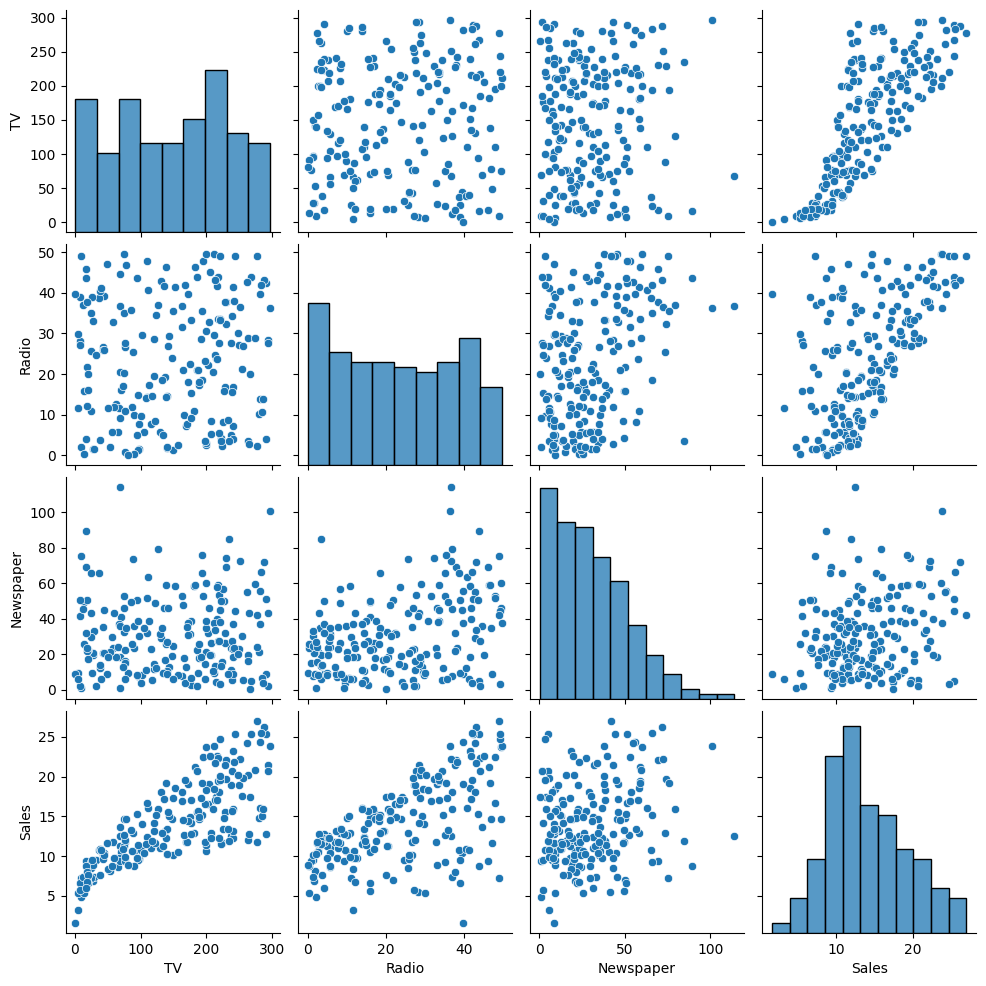

In [26]:
sns.pairplot(data)

In [27]:
correlation = data.corr()

In [28]:
correlation

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


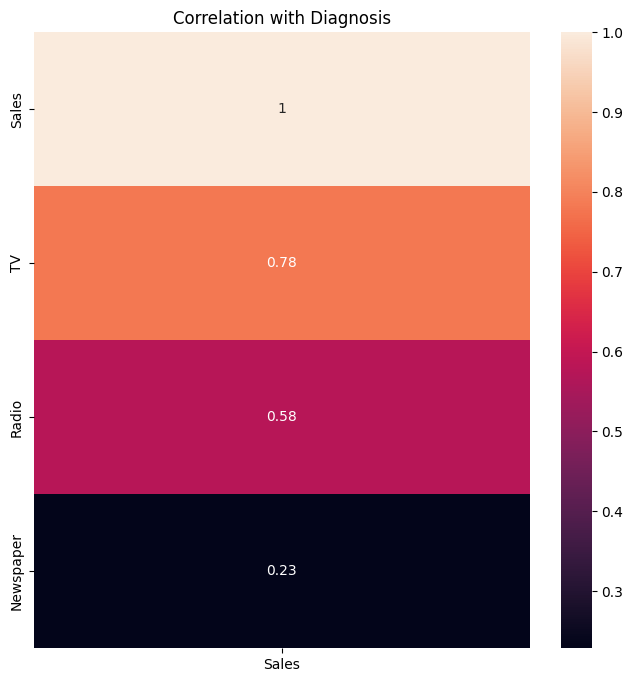

In [29]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation[['Sales']].sort_values(by='Sales', ascending=False), annot=True)
plt.title("Correlation with Diagnosis")
plt.show()

In [30]:
x =data.drop('Sales',axis = 1)
y = data['Sales']


In [31]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=45)

R2 Score =  89.56%
Mean Absolute Error =  1.078880276384865
Mean Squared Error =  2.2564942472809357
Root Mean Squared Error =  1.5021631892976661


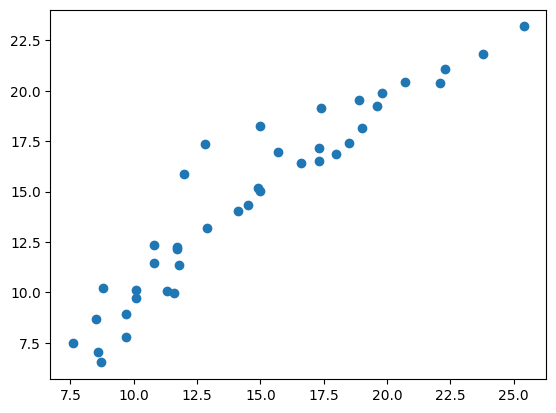

In [33]:
LR = train_test_model(LinearRegression(),x_train,x_test,y_train,y_test)

In [34]:
# the coefficients
LR.coef_
# The coefficients in a dataframe
cdata = pd.DataFrame(LR.coef_,x.columns,columns=['Coef'])
cdata.reset_index()

,index,Coef
0,TV,13.896014
1,Radio,9.099685
2,Newspaper,-0.553100


R2 Score =  94.48%
Mean Absolute Error =  0.8600000000000003
Mean Squared Error =  1.1935000000000007
Root Mean Squared Error =  1.0924742559895866


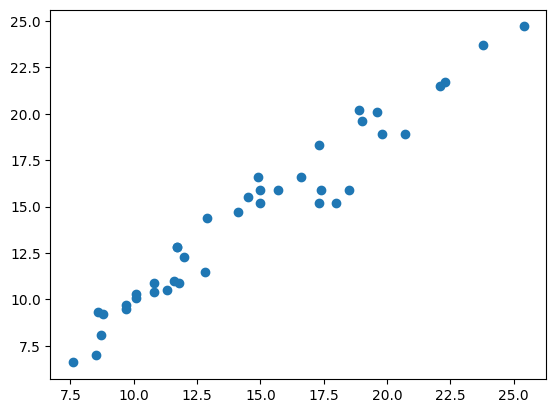

In [35]:
DR = train_test_model(DecisionTreeRegressor(),x_train,x_test,y_train,y_test)

In [36]:
importances = DR.feature_importances_
feature_names = x.columns
importance_data= pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_data = importance_data.sort_values(by='Importance', ascending=False)
importance_data

,Feature,Importance
0,TV,0.642585
1,Radio,0.353686
2,Newspaper,0.003730


R2 Score =  97.61%
Mean Absolute Error =  0.5743499999999984
Mean Squared Error =  0.517307599999996
Root Mean Squared Error =  0.7192409888208513


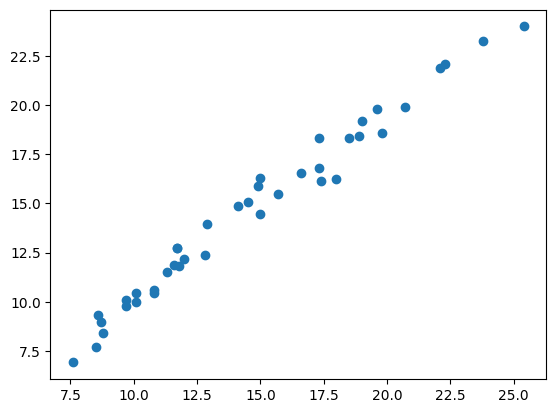

In [37]:
RF = train_test_model(RandomForestRegressor(),x_train,x_test,y_train,y_test)

In [38]:
importances = RF.feature_importances_
feature_names = x.columns
importance_data= pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_data = importance_data.sort_values(by='Importance', ascending=False)
importance_data

,Feature,Importance
0,TV,0.646295
1,Radio,0.341114
2,Newspaper,0.012592


R2 Score =  97.65%
Mean Absolute Error =  0.5480284333229064
Mean Squared Error =  0.5068155642077319
Root Mean Squared Error =  0.7119098006122208


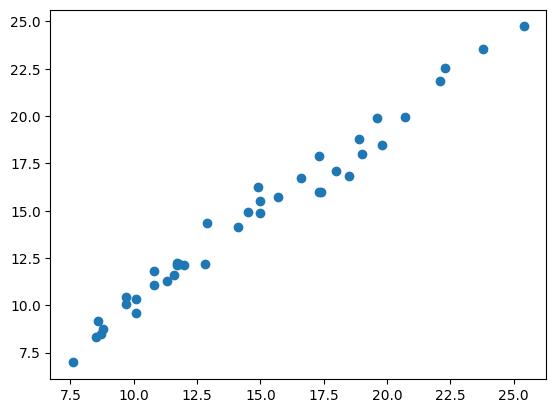

In [39]:
XG = train_test_model(XGBRegressor(),x_train,x_test,y_train,y_test)

In [40]:
importances = XG.feature_importances_
feature_names = x.columns
importance_data= pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_data = importance_data.sort_values(by='Importance', ascending=False)
importance_data

,Feature,Importance
0,TV,0.558034
1,Radio,0.436575
2,Newspaper,0.005391
